# Project: House Price Prediction for Bangalore

## Project Objectives
The objective of this project is to develop a predictive model for estimating house prices in Bangalore based on various features such as location, square footage, number of bedrooms, and other relevant factors. The aim is to assist potential buyers, sellers, and real estate professionals in making data-driven decisions.

## Project Overview
This project follows a structured data science workflow, including data collection, cleaning, exploration, feature engineering, model development, evaluation, and deployment.

### Steps Followed in the Project

1. **Problem Understanding**
   - Define the problem: Predict house prices based on given data.
   - Identify key features that influence house prices in Bangalore.

2. **Data Collection**
   - Collect housing data for Bangalore from reliable sources.
   - Data includes attributes such as total_sqft, location, number of bedrooms (BHK), number of bathrooms, price, and more.

3. **Data Preprocessing**
   - Handle missing values: Remove or impute missing entries in the dataset (e.g., handling NaN in `total_sqft`).
   - Remove duplicate entries and outliers to ensure clean data.
   - Normalize or scale numerical features if necessary.

4. **Exploratory Data Analysis (EDA)**
   - Analyze the distribution of house prices and other key features.
   - Visualize relationships between features using scatter plots, histograms, and correlation matrices.
   - Identify trends and patterns specific to Bangalore's real estate market.

5. **Feature Engineering**
   - Convert non-numeric columns (e.g., location) into numerical format using one-hot encoding or label encoding.
   - Engineer new features such as price per square foot for better insights.
   - Handle high-cardinality features (e.g., locations with too many unique values).

6. **Model Development**
   - Split the data into training and testing sets.
   - Train multiple machine learning models, including:
     - Linear Regression
     - Lasso Regression
     - Decision Tree Regressor
     - Random Forest Regressor
     - Gradient Boosting Regressor
   - Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize model performance.

7. **Model Evaluation**
   - Evaluate models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
   - Compare model performance to select the best-performing model.

8. **Deployment**
   - Deploy the final model using Flask or FastAPI to create a web application.
   - Provide a user-friendly interface where users can input features and get predicted house prices.

9. **Documentation and Sharing**
   - Document all steps, methodologies, and findings.
   - Share the code and insights via GitHub for reproducibility and collaboration.

## Files and Directories

- **data/**: Contains the dataset used in the project.
- **notebooks/**: Jupyter Notebooks for EDA, preprocessing, and model training.
- **models/**: Saved models in serialized format (e.g., `.pkl` files).
- **app/**: Flask or FastAPI application for model deployment.
- **README.md**: Detailed description of the project, including objectives, methodologies, and instructions for running the code.

## Technologies Used

- Programming Language: Python
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Flask/FastAPI
- Tools: Jupyter Notebook, VS Code



## Results and Insights

- Developed a predictive model with an R-squared score of 6%.
- Key insights include:
  - Locations with the highest average prices.
  - Features that most influence house prices in Bangalore.

## Future Work

- Integrate additional data sources for better accuracy.
- Enhance the web interface with interactive visualizations.
- Extend the model for other cities.

---

Feel free to customize the content further to reflect your specific project details.


In [294]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
data=pd.read_csv(r'E:\Data Set\csv file\datasets_20710_26737_Bengaluru_House_Data.csv')

# Besic Check

In [297]:
data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [298]:
data.shape

(13320, 9)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [300]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [301]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [302]:
null_percentage = (data.isnull().sum().sum() / (data.size)) * 100
null_percentage


5.172672672672673

In [303]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [304]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [305]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [306]:
data=data.drop(columns=['area_type','availability', 'society', 'balcony'])

In [307]:
data.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [308]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [309]:
data=data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [310]:
data['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [311]:
data['BHK'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [312]:
data.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [313]:
data['BHK'].value_counts()

BHK
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [314]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [315]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    
        

In [316]:
data[data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [317]:
def convert_sqrt_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [318]:
convert_sqrt_to_num('1133 - 1384')

1258.5

In [319]:
data=data.copy()
data['total_sqft'] = data['total_sqft'].apply(convert_sqrt_to_num)
data.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [320]:
cdata=data.copy()
cdata['price_per_sqrt']=cdata['price']*100000/cdata['total_sqft']
cdata.head(5)

,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [321]:
cdata.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [322]:
cdata.location.value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [323]:
cdata.location=cdata.location.apply(lambda x: x.strip())
location_stats = cdata.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [324]:
len(location_stats[location_stats<=10])

1052

In [325]:
location_stats_less_than_10= location_stats[location_stats<=10]

In [326]:
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [327]:
len(cdata.location.unique())

1293

In [328]:
cdata.location=cdata.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [329]:
len(cdata.location.unique())

242

In [330]:
df = cdata[~(cdata.total_sqft/cdata.BHK<300)]
df.shape

(12502, 7)

# Removing Outlier by Using Standard Deviation and Mean

In [332]:
 def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df1 = remove_pps_outliers(df)
df1.shape

(10241, 7)

In [333]:
def plot_scatter_chart(data,location):
    BHK2 = data[(data.location==location) & (data.BHK==2)]
    BHK3 = data[(data.location==location) & (data.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

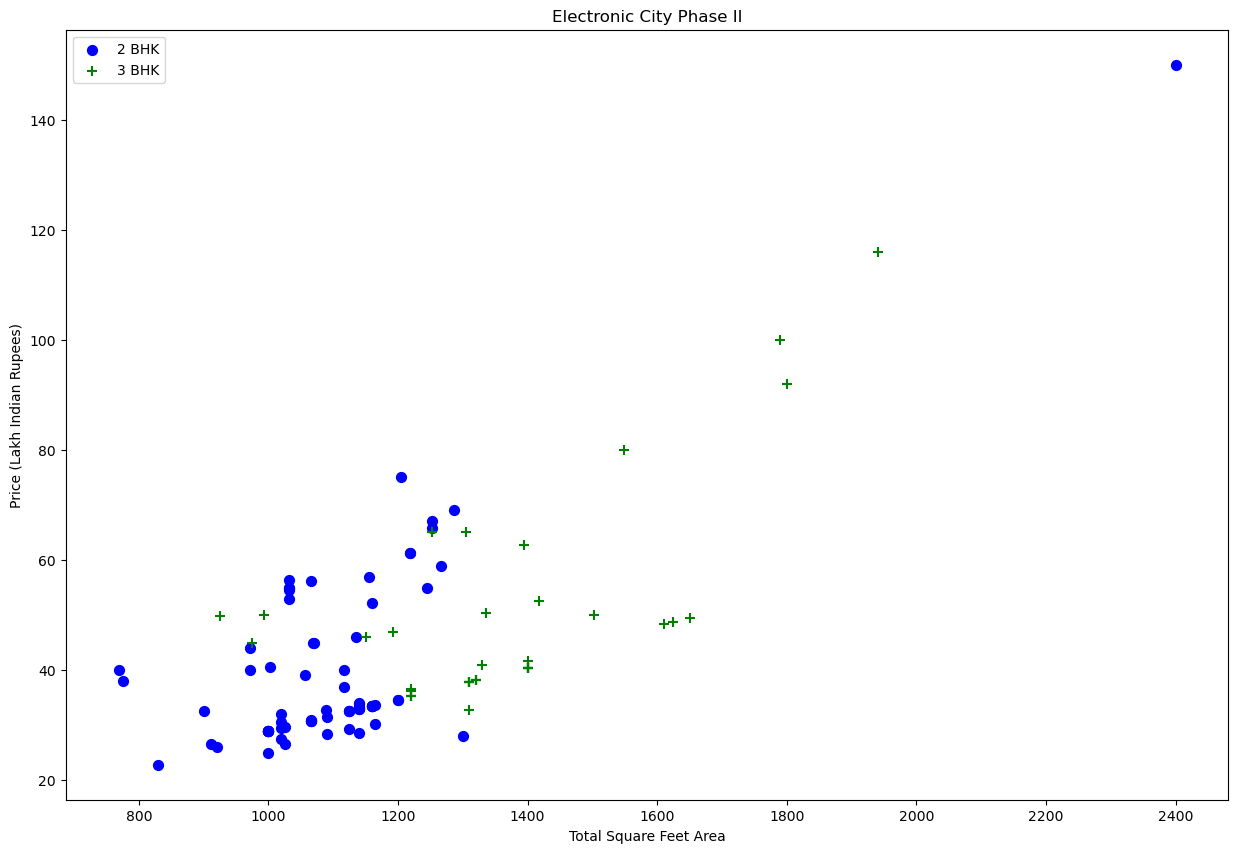

In [334]:
plot_scatter_chart(df,"Electronic City Phase II")

In [335]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([], dtype=int)
    for location, location_df in df.groupby('location'):
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_df['price_per_sqrt'].describe()
            if stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df['price_per_sqrt'] < stats['mean']].index.values
                )
    # Ensure indices exist in the DataFrame before dropping
    exclude_indices = np.intersect1d(exclude_indices, df.index)
    return df.drop(exclude_indices, axis='index', errors='ignore')

df2 = remove_bhk_outliers(df)
df2.shape


(5955, 7)

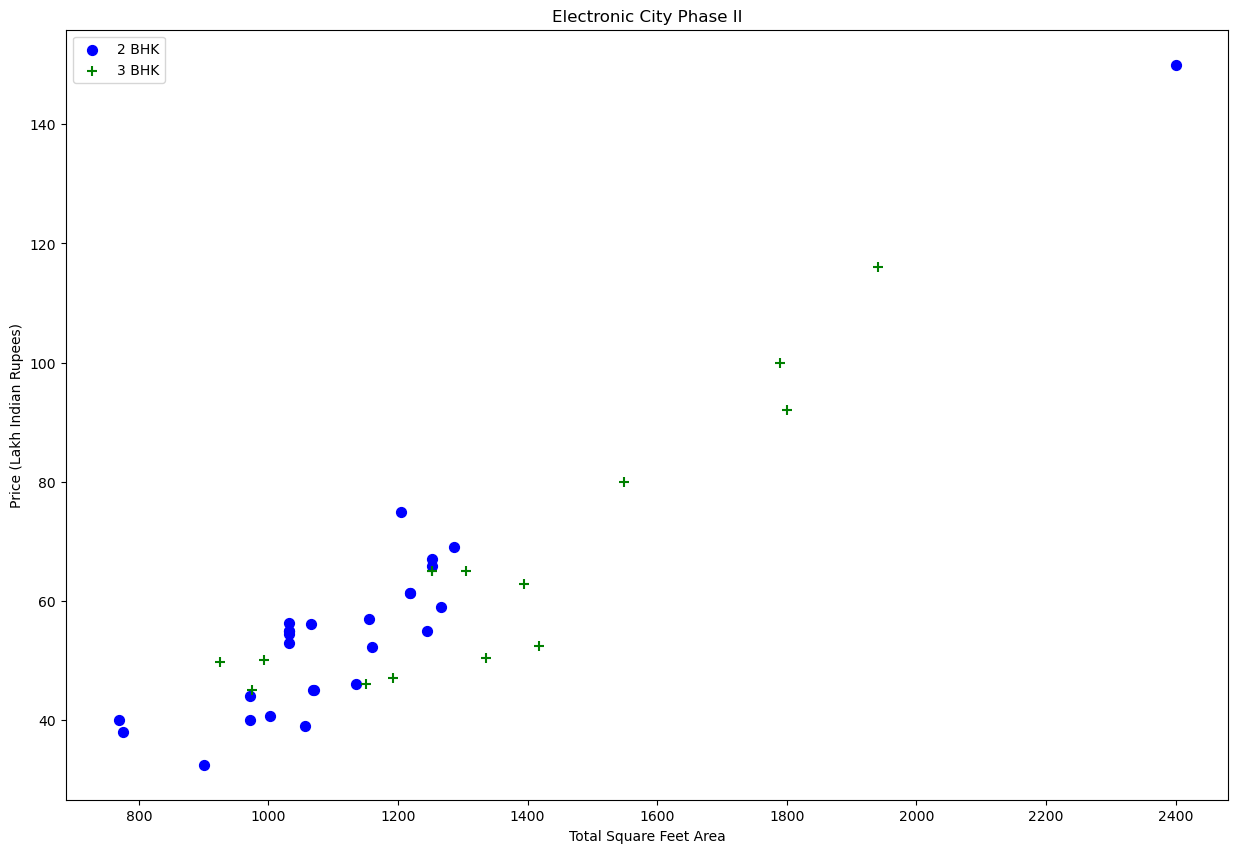

In [336]:
plot_scatter_chart(df82,"Electronic City Phase II")


Text(0, 0.5, 'Count')

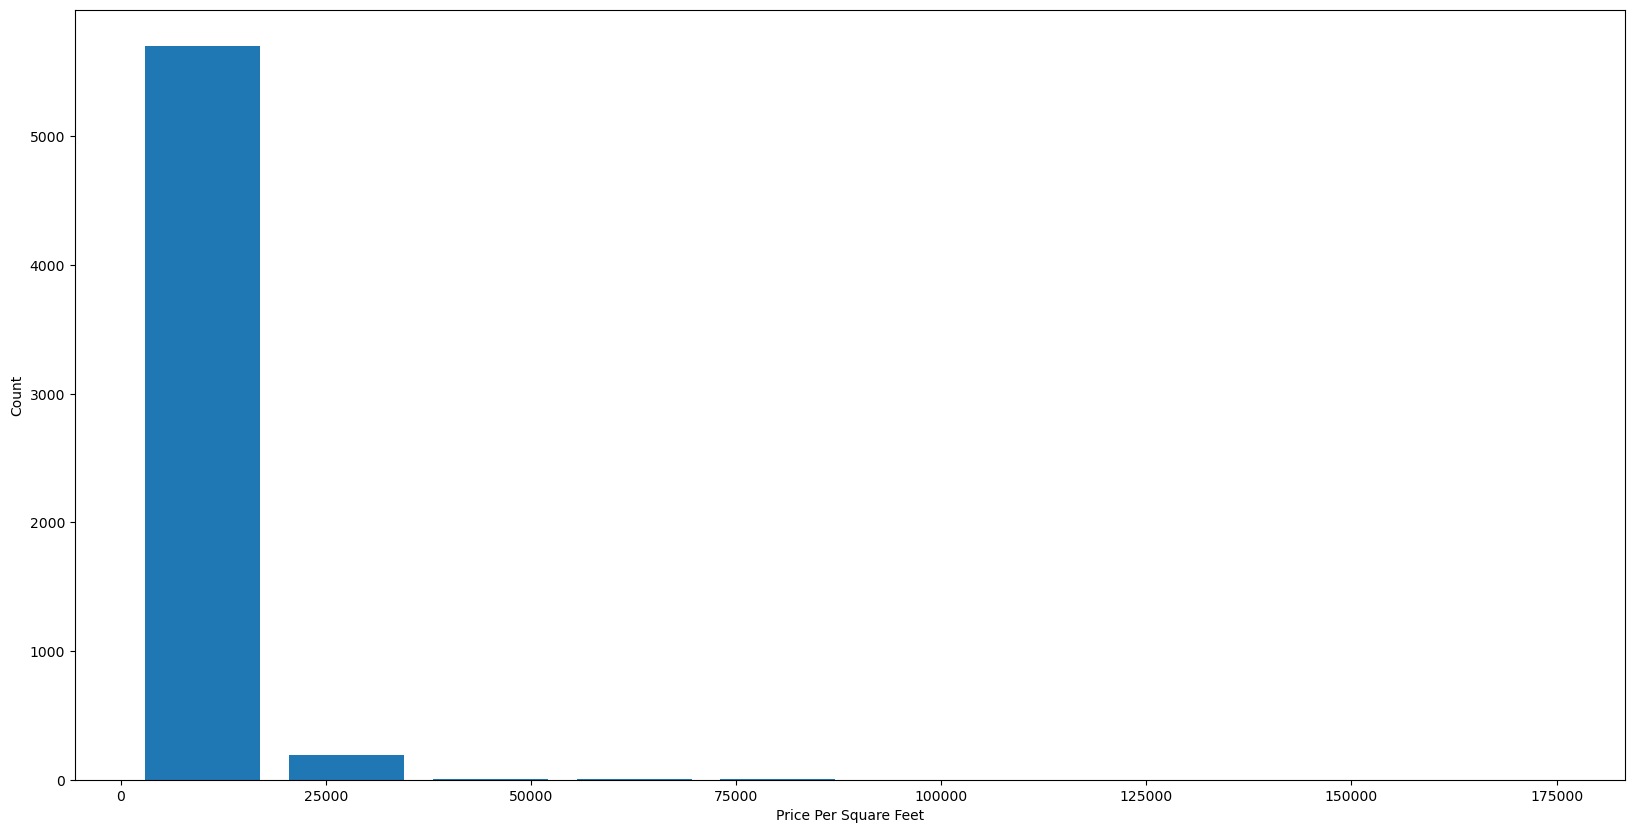

In [337]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_per_sqrt,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [338]:
df2.bath.unique()


array([ 2.,  5.,  4.,  3.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

Text(0, 0.5, 'Count')

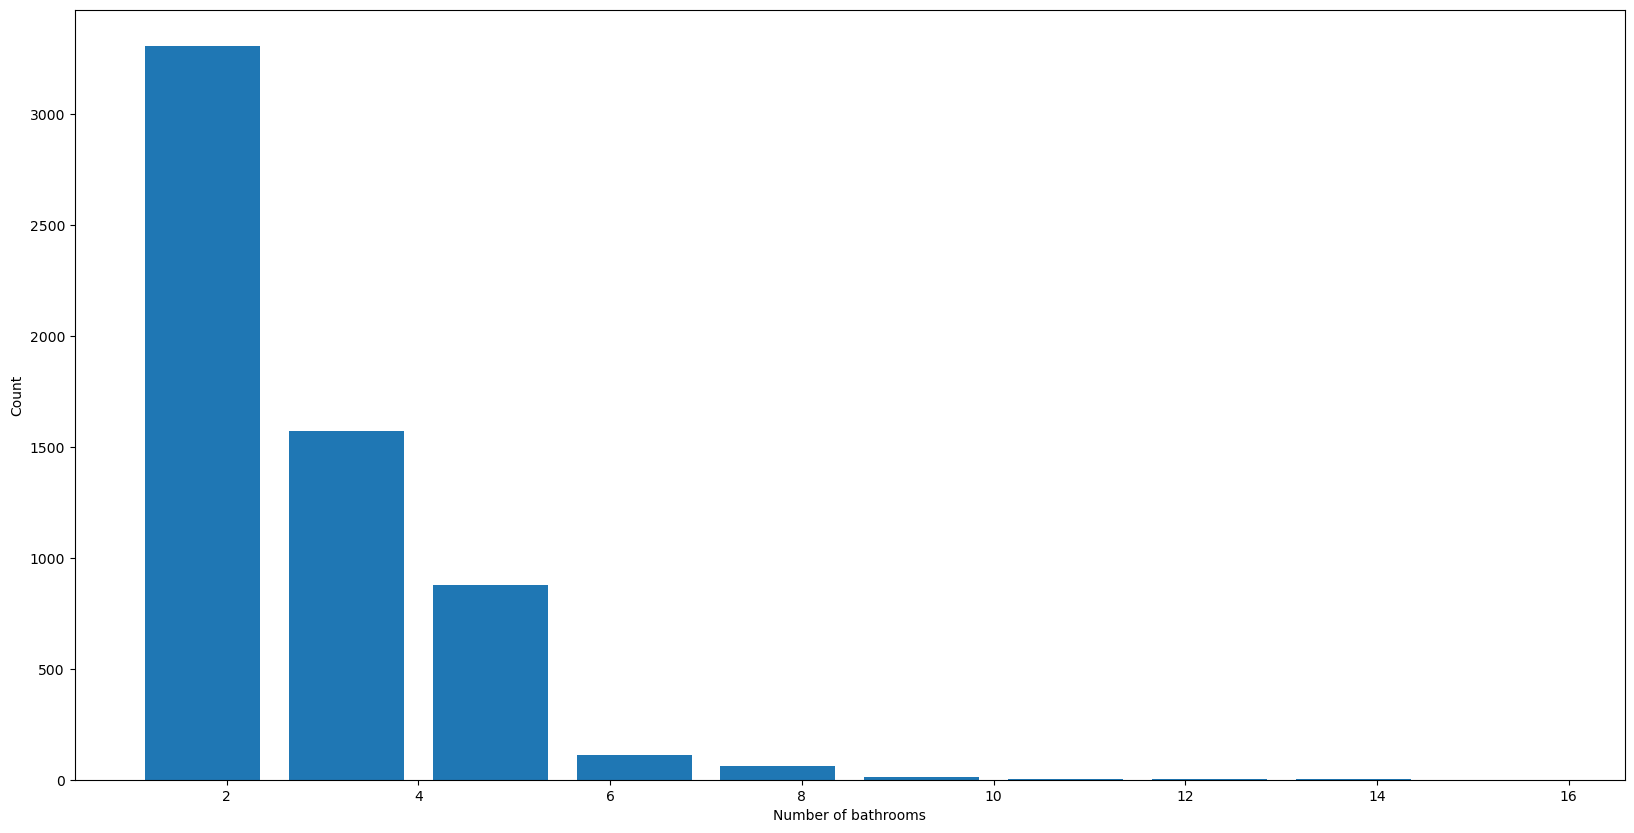

In [339]:
plt.hist(df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [340]:
df2[df2.bath>10]


,location,size,total_sqft,bath,price,BHK,price_per_sqrt
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


In [341]:
df3 = df2[df2.bath<df2.BHK+2]
df3.shape

(5852, 7)

In [342]:
df3.head()


,location,size,total_sqft,bath,price,BHK,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [343]:
df4 = df3.drop(['size','price_per_sqrt'],axis='columns')
df4.head(3)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


# Encoding 

In [345]:
dummies = pd.get_dummies(df4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [346]:
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df5.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Rajaji Nagar,3300.0,4.0,600.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,Whitefield,2785.0,5.0,295.00,4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [347]:
df6 = df5.drop('location',axis='columns')
df6.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model Building

In [349]:
df6.shape


(5852, 245)

In [350]:
df6 = df6.dropna(subset=['total_sqft'])

In [351]:
X = df6.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [352]:
X.shape


(5806, 244)

In [353]:
y = df6.price
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [354]:
len(y)


5806

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [356]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6274329900123725

In [422]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]  # Replacing 'normalize' due to deprecation
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated criterion
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        try:
            gs.fit(X, y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
        except Exception as e:
            print(f"Error with {algo_name}: {e}")
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (ensure X and y are defined properly)
# result = find_best_model_using_gridsearchcv(X, y)
# print(result)


In [424]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.624369,{'fit_intercept': True}
1,lasso,0.605321,"{'alpha': 0.1, 'selection': 'cyclic'}"
2,decision_tree,0.484802,"{'criterion': 'friedman_mse', 'max_depth': 10,..."


In [426]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [428]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.08160133891363

In [430]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.58471195842924

In [432]:
predict_price('Indira Nagar',1000, 2, 2)


C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


276.9551637922395

In [434]:
predict_price('Indira Nagar',1000, 3, 3)


C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


286.4582744117551